In [1]:
#Based off of: https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
#This is really comprehensive and the analysis was simply beautiful
#Hopefully I'll be able to gain some insights on my dataet using this.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#somehow I was not able to get seaborn installed in my tensorflow env, so 
#the non tensorflow env had to bail me out
#here in lies the advantage of multiple envs.
%matplotlib inline

plt.style.use('bmh')

In [2]:
#the "r" after the "(" is the magic elixir that helps avoid UTF problems.
df = pd.read_excel(r"C:\ML Hackathon\pandas_output2.xlsx")
df = df.drop(columns = ["State_x","County_x"])
df.head()

FIPS  Population, low access to store, 2010  \
2105  39127                            3713.640840   
335   12035                           33564.747365   
561   16023                             605.164533   
358   12081                           74391.881668   
1145  22067                            6896.431864   

      Population, low access to store, 2015  \
2105                            1410.531617   
335                            33041.245469   
561                              618.473210   
358                            70204.895488   
1145                            6826.518316   

      Low income & low access to store, 2010  \
2105                             1898.685754   
335                              9805.739747   
561                               267.297015   
358                             18524.575189   
1145                             3895.543014   

      Low income & low access to store, 2015  \
2105                              847.224107   
335                             12181.425241   
561                               307.711414   
358                             20564.984354   
1145                             4231.922584   

      Households, no car & low access to store, 2010  \
2105                                      790.543946   
335                                       861.286373   
561                                         6.680208   
358                                      1306.101746   
1145                                      687.008404   

      Households, no car & low access to store, 2015  \
2105                                      603.868779   
335                                       913.009272   
561                                         9.092895   
358                                      1547.709725   
1145                                      726.285267   

      SNAP households, low access to store, 2015  \
2105                                  168.620514   
335                                  1255.111943   
561                                    28.709604   
358                                  2335.402236   
1145                                  628.112358   

      Children, low access to store, 2010  \
2105                          1094.142002   
335                           6983.983143   
561                            199.206240   
358                          12245.034104   
1145                          1723.974298   

      Children, low access to store, 2015            ...              \
2105                           420.357841            ...               
335                           6912.412843            ...               
561                            202.391428            ...               
358                          11756.424482            ...               
1145                          1650.583590            ...               

      Persistent-child-poverty counties, 2010  Metro/nonmetro counties, 2010  \
2105                                        0                              0   
335                                         1                              1   
561                                         0                              0   
358                                         1                              0   
1145                                        1                              0   

      Population-loss counties, 2010  2010 Census Population  \
2105                             1.0                   36058   
335                              0.0                   95696   
561                              0.0                    2891   
358                              0.0                  322833   
1145                             0.0                   27979   

      Population Estimate, 2011  Population Estimate, 2012  \
2105                      36207                      35991   
335                       97412                      98605   
561                        2805                       2722   
358             

In [3]:
print(df.isnull().sum())

FIPS                                                              0
Population, low access to store, 2010                             0
Population, low access to store, 2015                            19
Low income & low access to store, 2010                            0
Low income & low access to store, 2015                           20
Households, no car & low access to store, 2010                    0
Households, no car & low access to store, 2015                    3
SNAP households, low access to store, 2015                       20
Children, low access to store, 2010                               0
Children, low access to store, 2015                              19
Seniors, low access to store, 2010                                0
Seniors, low access to store, 2015                               19
White, low access to store, 2015                                 19
Black, low access to store, 2015                                 19
Hispanic ethnicity, low access to store, 2015   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 2105 to 2016
Columns: 162 entries, FIPS to Population Estimate, 2016
dtypes: float64(126), int64(36)
memory usage: 3.9 MB


In [5]:
#dropping features which have more than 30% NaNs
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
print ("List of dropped columns:",end = " ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=" ")
print("\n")
#somehow this is not dropping Agritourism, 2007 when it actually should. WEIRD.


List of dropped columns: 



In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 2105 to 2016
Columns: 162 entries, FIPS to Population Estimate, 2016
dtypes: float64(126), int64(36)
memory usage: 3.9 MB


In [7]:
df_x = pd.read_excel(r"C:\ML Hackathon\Data_Download_with_defined_target.xls", sheet_name = "STORES")
df_x = df_x[["FIPS","TARGET"]]
df2 = pd.merge(df2,df_x,on="FIPS")
df2

FIPS  Population, low access to store, 2010  \
0     39127                            3713.640840   
1     12035                           33564.747365   
2     16023                             605.164533   
3     12081                           74391.881668   
4     22067                            6896.431864   
5      5031                           24129.965162   
6      1053                            5188.706191   
7     20093                             350.213727   
8     51013                            5136.184060   
9     42007                           67604.925063   
10    19021                            2738.827615   
11    16073                            2056.337099   
12    17197                          242455.252478   
13    54093                              74.186764   
14    22113                            3425.894350   
15    24023                            1294.428666   
16    32007                           11097.091084   
17    40073                            2273.643219   
18    48369                            1384.846203   
19    48311                             692.861567   
20    28045                           19685.624349   
21    19019                            2754.206725   
22     6091                            2855.023103   
23    41067                           70499.471920   
24    13187                             369.651192   
25    27161                            5686.913873   
26     1005                            5722.305602   
27    21111                          131566.316373   
28    48201                          886068.668386   
29    48489                             894.727926   
...     ...                                    ...   
3113  47175                              98.012924   
3114  19111                            4919.817292   
3115  16011                            9351.751607   
3116  31101                            1843.198095   
3117  17185                            1006.757797   
3118  30039                            1957.509309   
3119  50007                           31125.802607   
3120  18069                            7638.158415   
3121  26073                            5721.565859   
3122  38063                            3125.999993   
3123  21027                            1961.618828   
3124  40035                            2597.002975   
3125  31185                            3569.564528   
3126  22015                           29629.757174   
3127  55035                           26548.945007   
3128  18121                            1605.425198   
3129  42089                           50921.538488   
3130  35007                            7046.763464   
3131  21201                            1705.338039   
3132  34013                           68649.951470   
3133  13159                             916.431892   
3134  47075                            3041.491805   
3135   5129                            2725.718432   
3136  37137                             651.566458   
3137  16049                            5583.991627   
3138  12127                          150118.321800   
3139  20161                           35861.649365   
3140  39105                            4990.542475   
3141  39113                          158183.232590   
3142  38055                            4944.006611   

      Population, low access to store, 2015  \
0                               1410.531617   
1                              33041.245469   
2                                618.473210   
3                              70204.895488   
4                               6826.518316   
5                              15955.202306   
6                               5058.775403   
7                               3977.000000   
8                               4485.108839   
9                              62536.298461   
10                              1931.800972   
11                              2160.613404   
12                            217703.442343   


            TARGET
count  3143.000000
mean      0.406618
std       0.491281
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


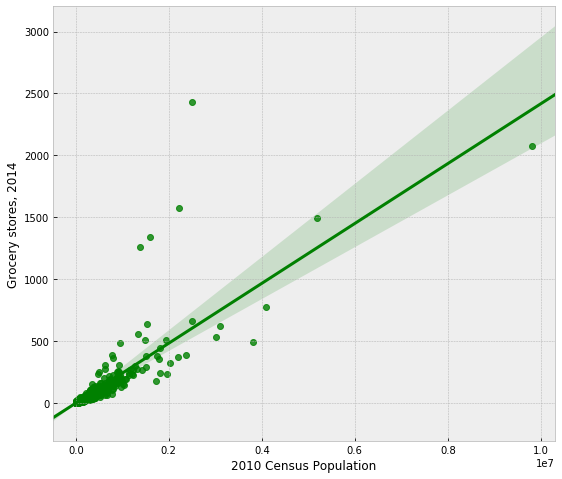

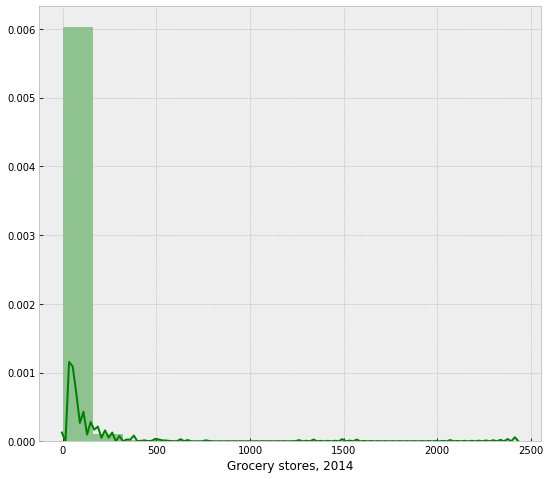

In [8]:
#plotting the distribution of grocery stores, the second graph has the distribution
#in the first one, I just wanted to see what the curve looks like for grocery stores vs population.
print(df2[["TARGET"]].describe())
plt.figure(figsize=(9,8))
sns.regplot(x = df2["2010 Census Population"], y = df2["Grocery stores, 2014"], color = 'g', fit_reg = "False")
plt.figure(figsize=(9,8))
sns.distplot(df2["Grocery stores, 2014"], color = "g", bins = 15, hist_kws = {'alpha' : 0.4})

In [9]:
df = df2
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64')]

In [10]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num = df.iloc[:,1:-1]
df_num.head()

Population, low access to store, 2010  \
0                            3713.640840   
1                           33564.747365   
2                             605.164533   
3                           74391.881668   
4                            6896.431864   

   Population, low access to store, 2015  \
0                            1410.531617   
1                           33041.245469   
2                             618.473210   
3                           70204.895488   
4                            6826.518316   

   Low income & low access to store, 2010  \
0                             1898.685754   
1                             9805.739747   
2                              267.297015   
3                            18524.575189   
4                             3895.543014   

   Low income & low access to store, 2015  \
0                              847.224107   
1                            12181.425241   
2                              307.711414   
3                            20564.984354   
4                             4231.922584   

   Households, no car & low access to store, 2010  \
0                                      790.543946   
1                                      861.286373   
2                                        6.680208   
3                                     1306.101746   
4                                      687.008404   

   Households, no car & low access to store, 2015  \
0                                      603.868779   
1                                      913.009272   
2                                        9.092895   
3                                     1547.709725   
4                                      726.285267   

   SNAP households, low access to store, 2015  \
0                                  168.620514   
1                                 1255.111943   
2                                   28.709604   
3                                 2335.402236   
4                                  628.112358   

   Children, low access to store, 2010  Children, low access to store, 2015  \
0                          1094.142002                           420.357841   
1                          6983.983143                          6912.412843   
2                           199.206240                           202.391428   
3                         12245.034104                         11756.424482   
4                          1723.974298                          1650.583590   

   Seniors, low access to store, 2010            ...              \
0                          456.217887            ...               
1                         8236.167390            ...               
2                           74.483135            ...               
3                        21417.001485            ...               
4                         1035.606703            ...               

   Persistent-child-poverty counties, 2010  Metro/nonmetro counties, 2010  \
0                                        0                              0   
1                                        1                              1   
2                                        0                              0   
3                                        1                              0   
4                                        1                              0   

   Population-loss counties, 2010  2010 Census Population  \
0                             1.0                   36058   
1                             0.0                   95696   
2                             0.0                    2891   
3                             0.0                  322833   
4                             0.0                   27979   

   Population Estimate, 2011  Population Estimate, 2012  \
0                      36207                      35991   
1                      97412                      98605   
2                       2805                       2722   
3                     327373                    

In [ ]:
#df_num.hist(figsize=(320,400), bins = 25, xlabelsize=12, ylabelsize=12)

In [11]:
#separating into two dataframes for better vsisbility:
df_num1 = df.iloc[:,1:81]
df_num2 = df.iloc[:,81:-1]
print(df_num1.shape)
print(df_num2.shape)

(3143, 80)
(3143, 81)


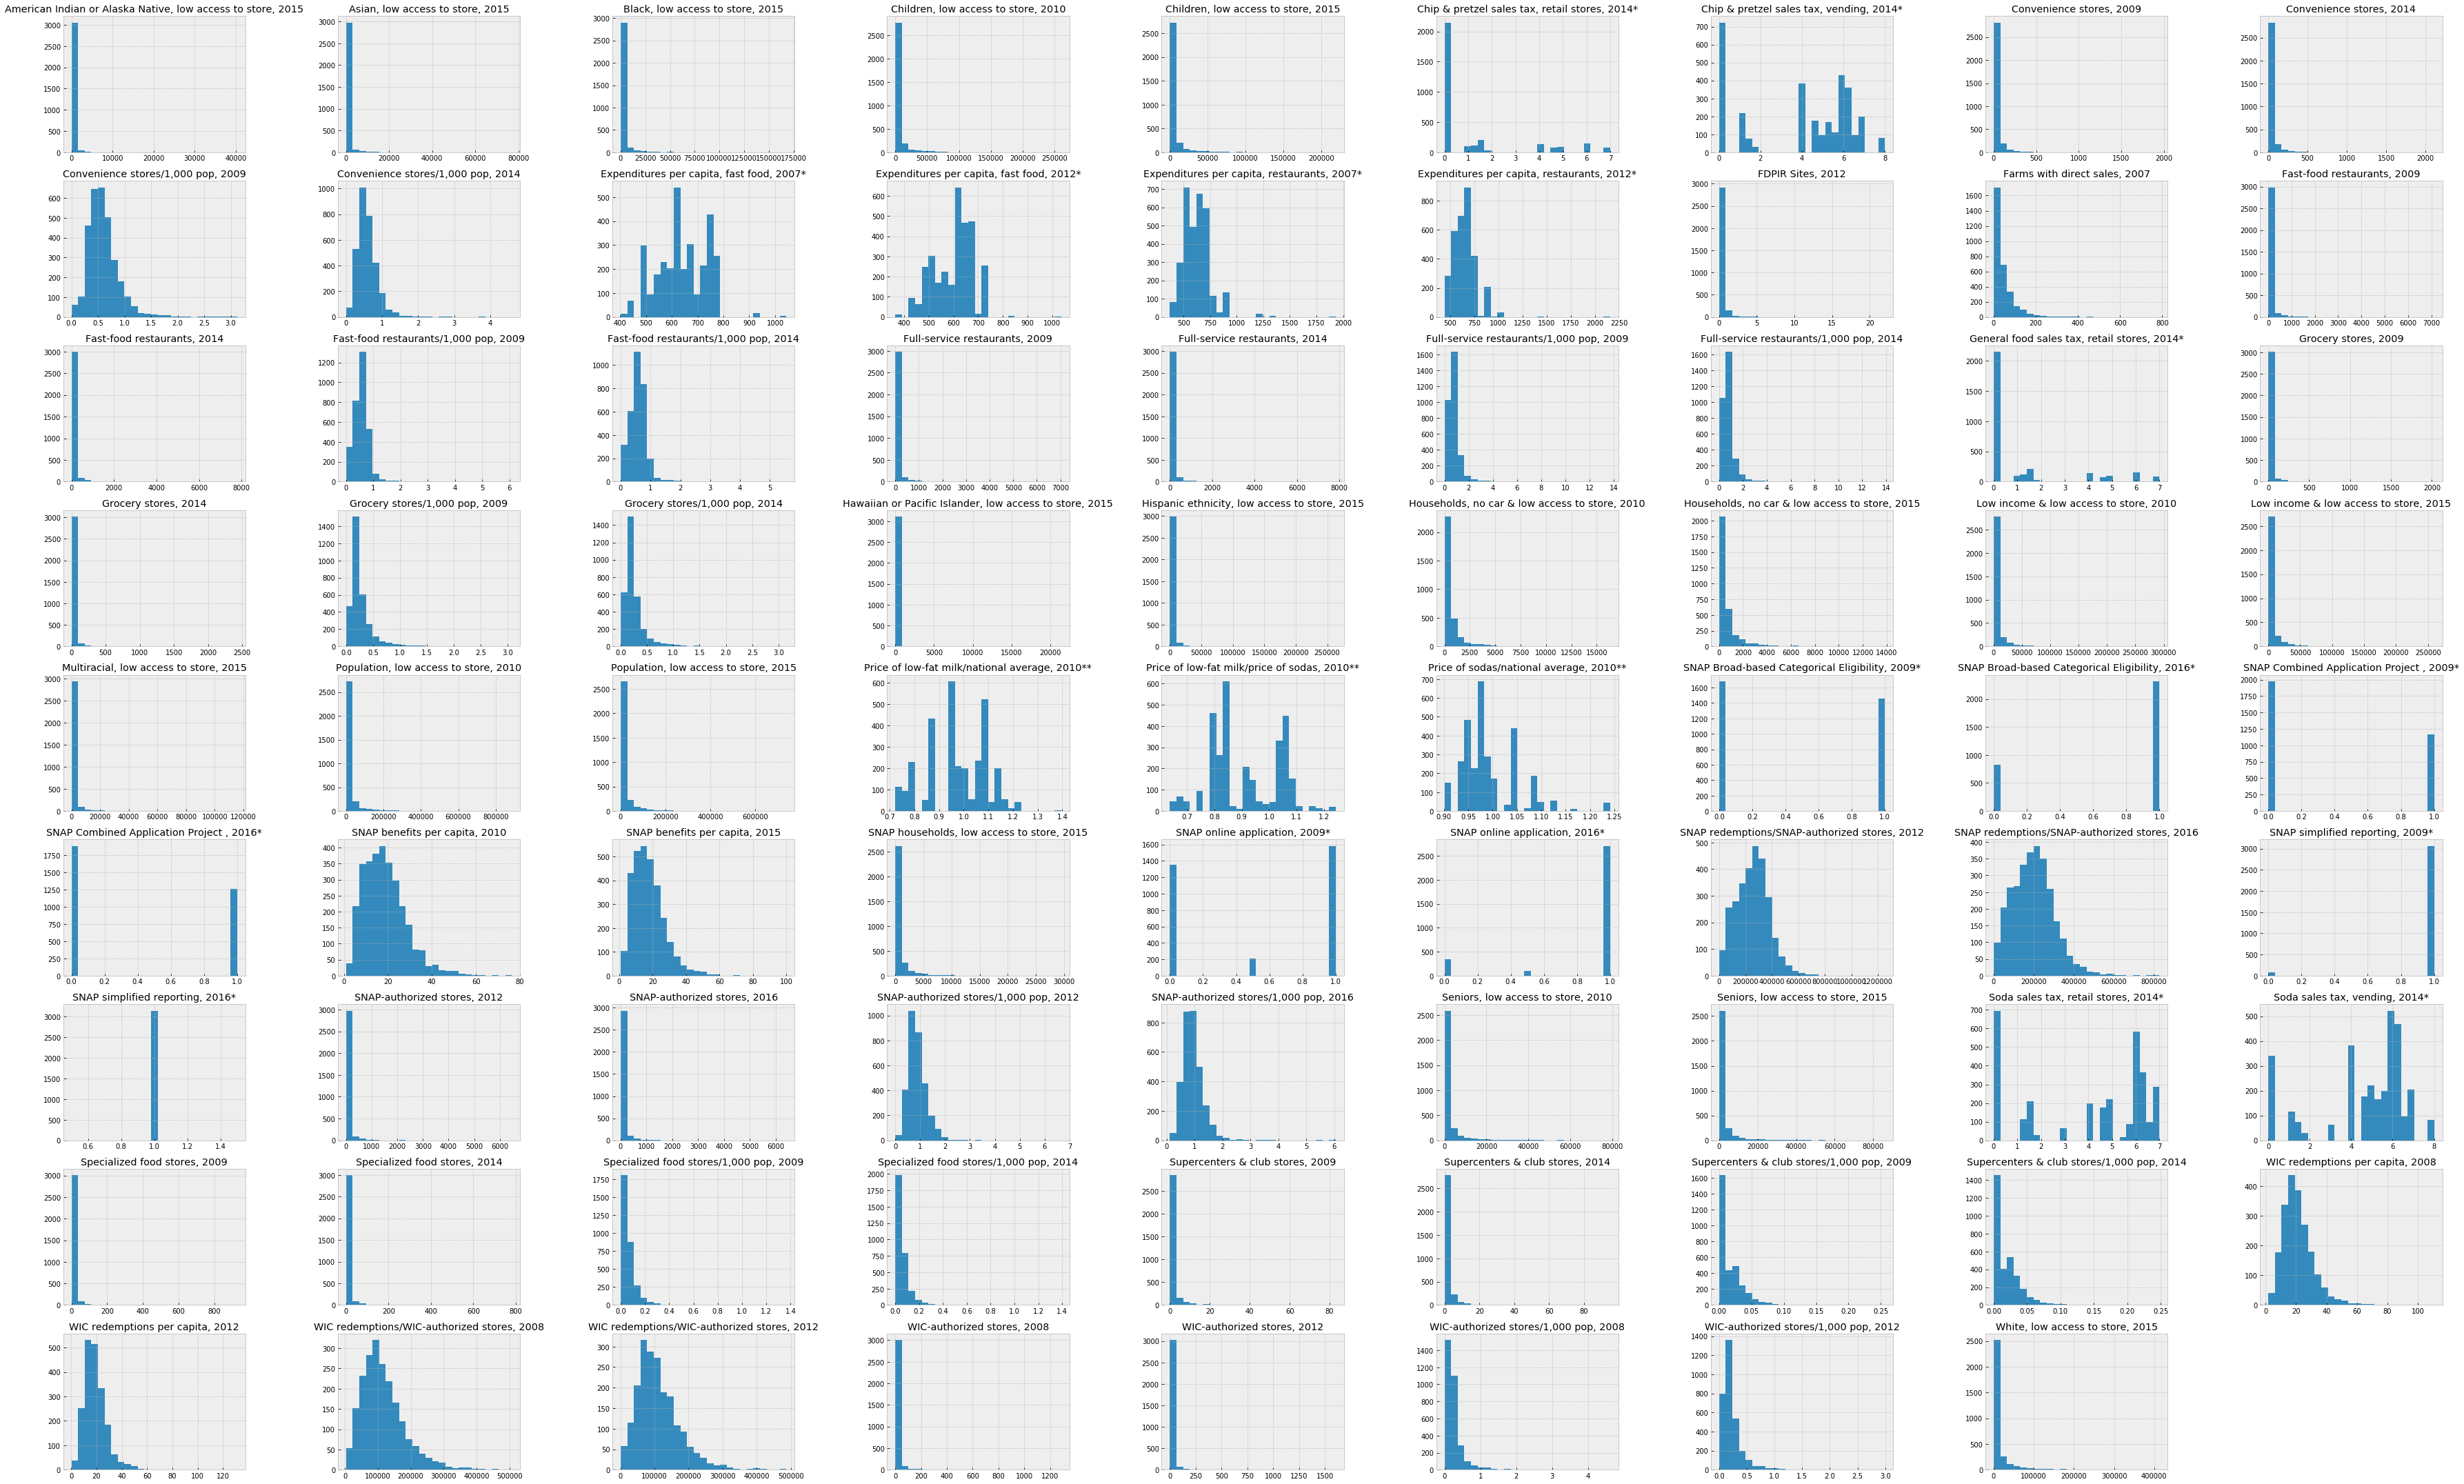

In [12]:
#all together now
fig = df_num1.hist(figsize=(50,30), bins=25)
plt.tight_layout()
plt.show()

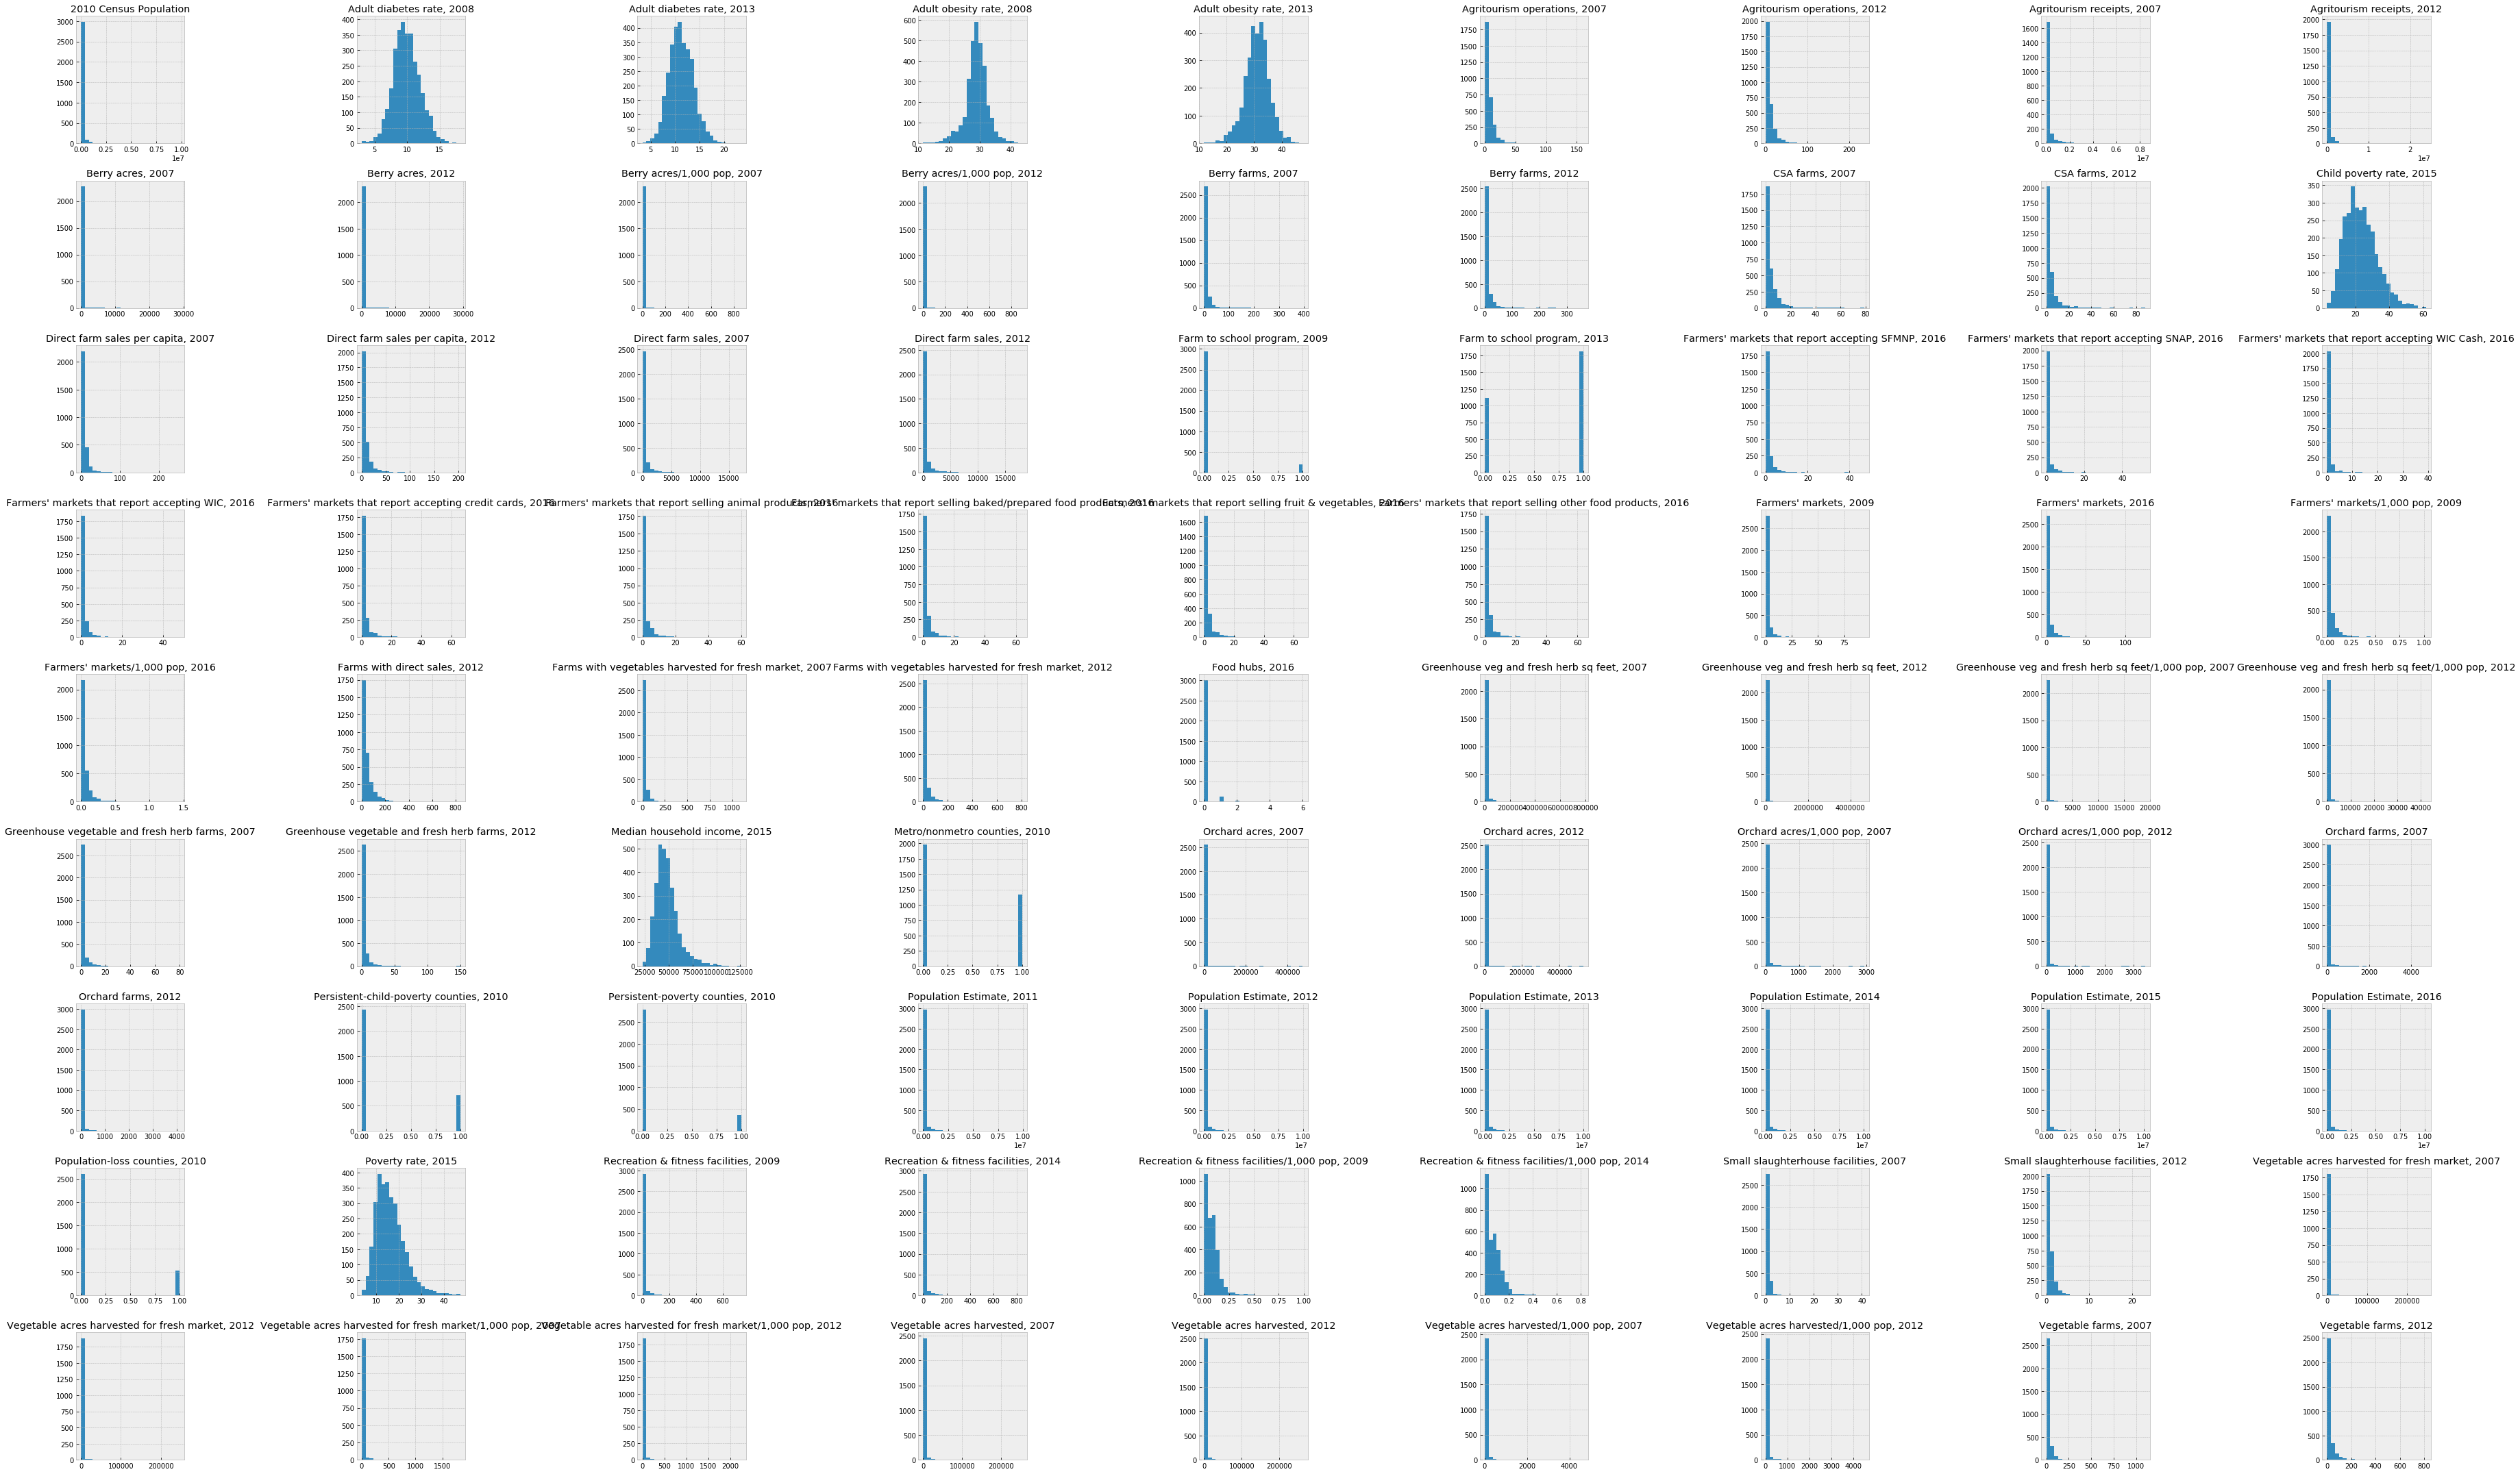

In [13]:
#the other half? dare i say, the better half?
fig = df_num2.hist(figsize=(50,30), bins = 25)
plt.tight_layout()
plt.show()

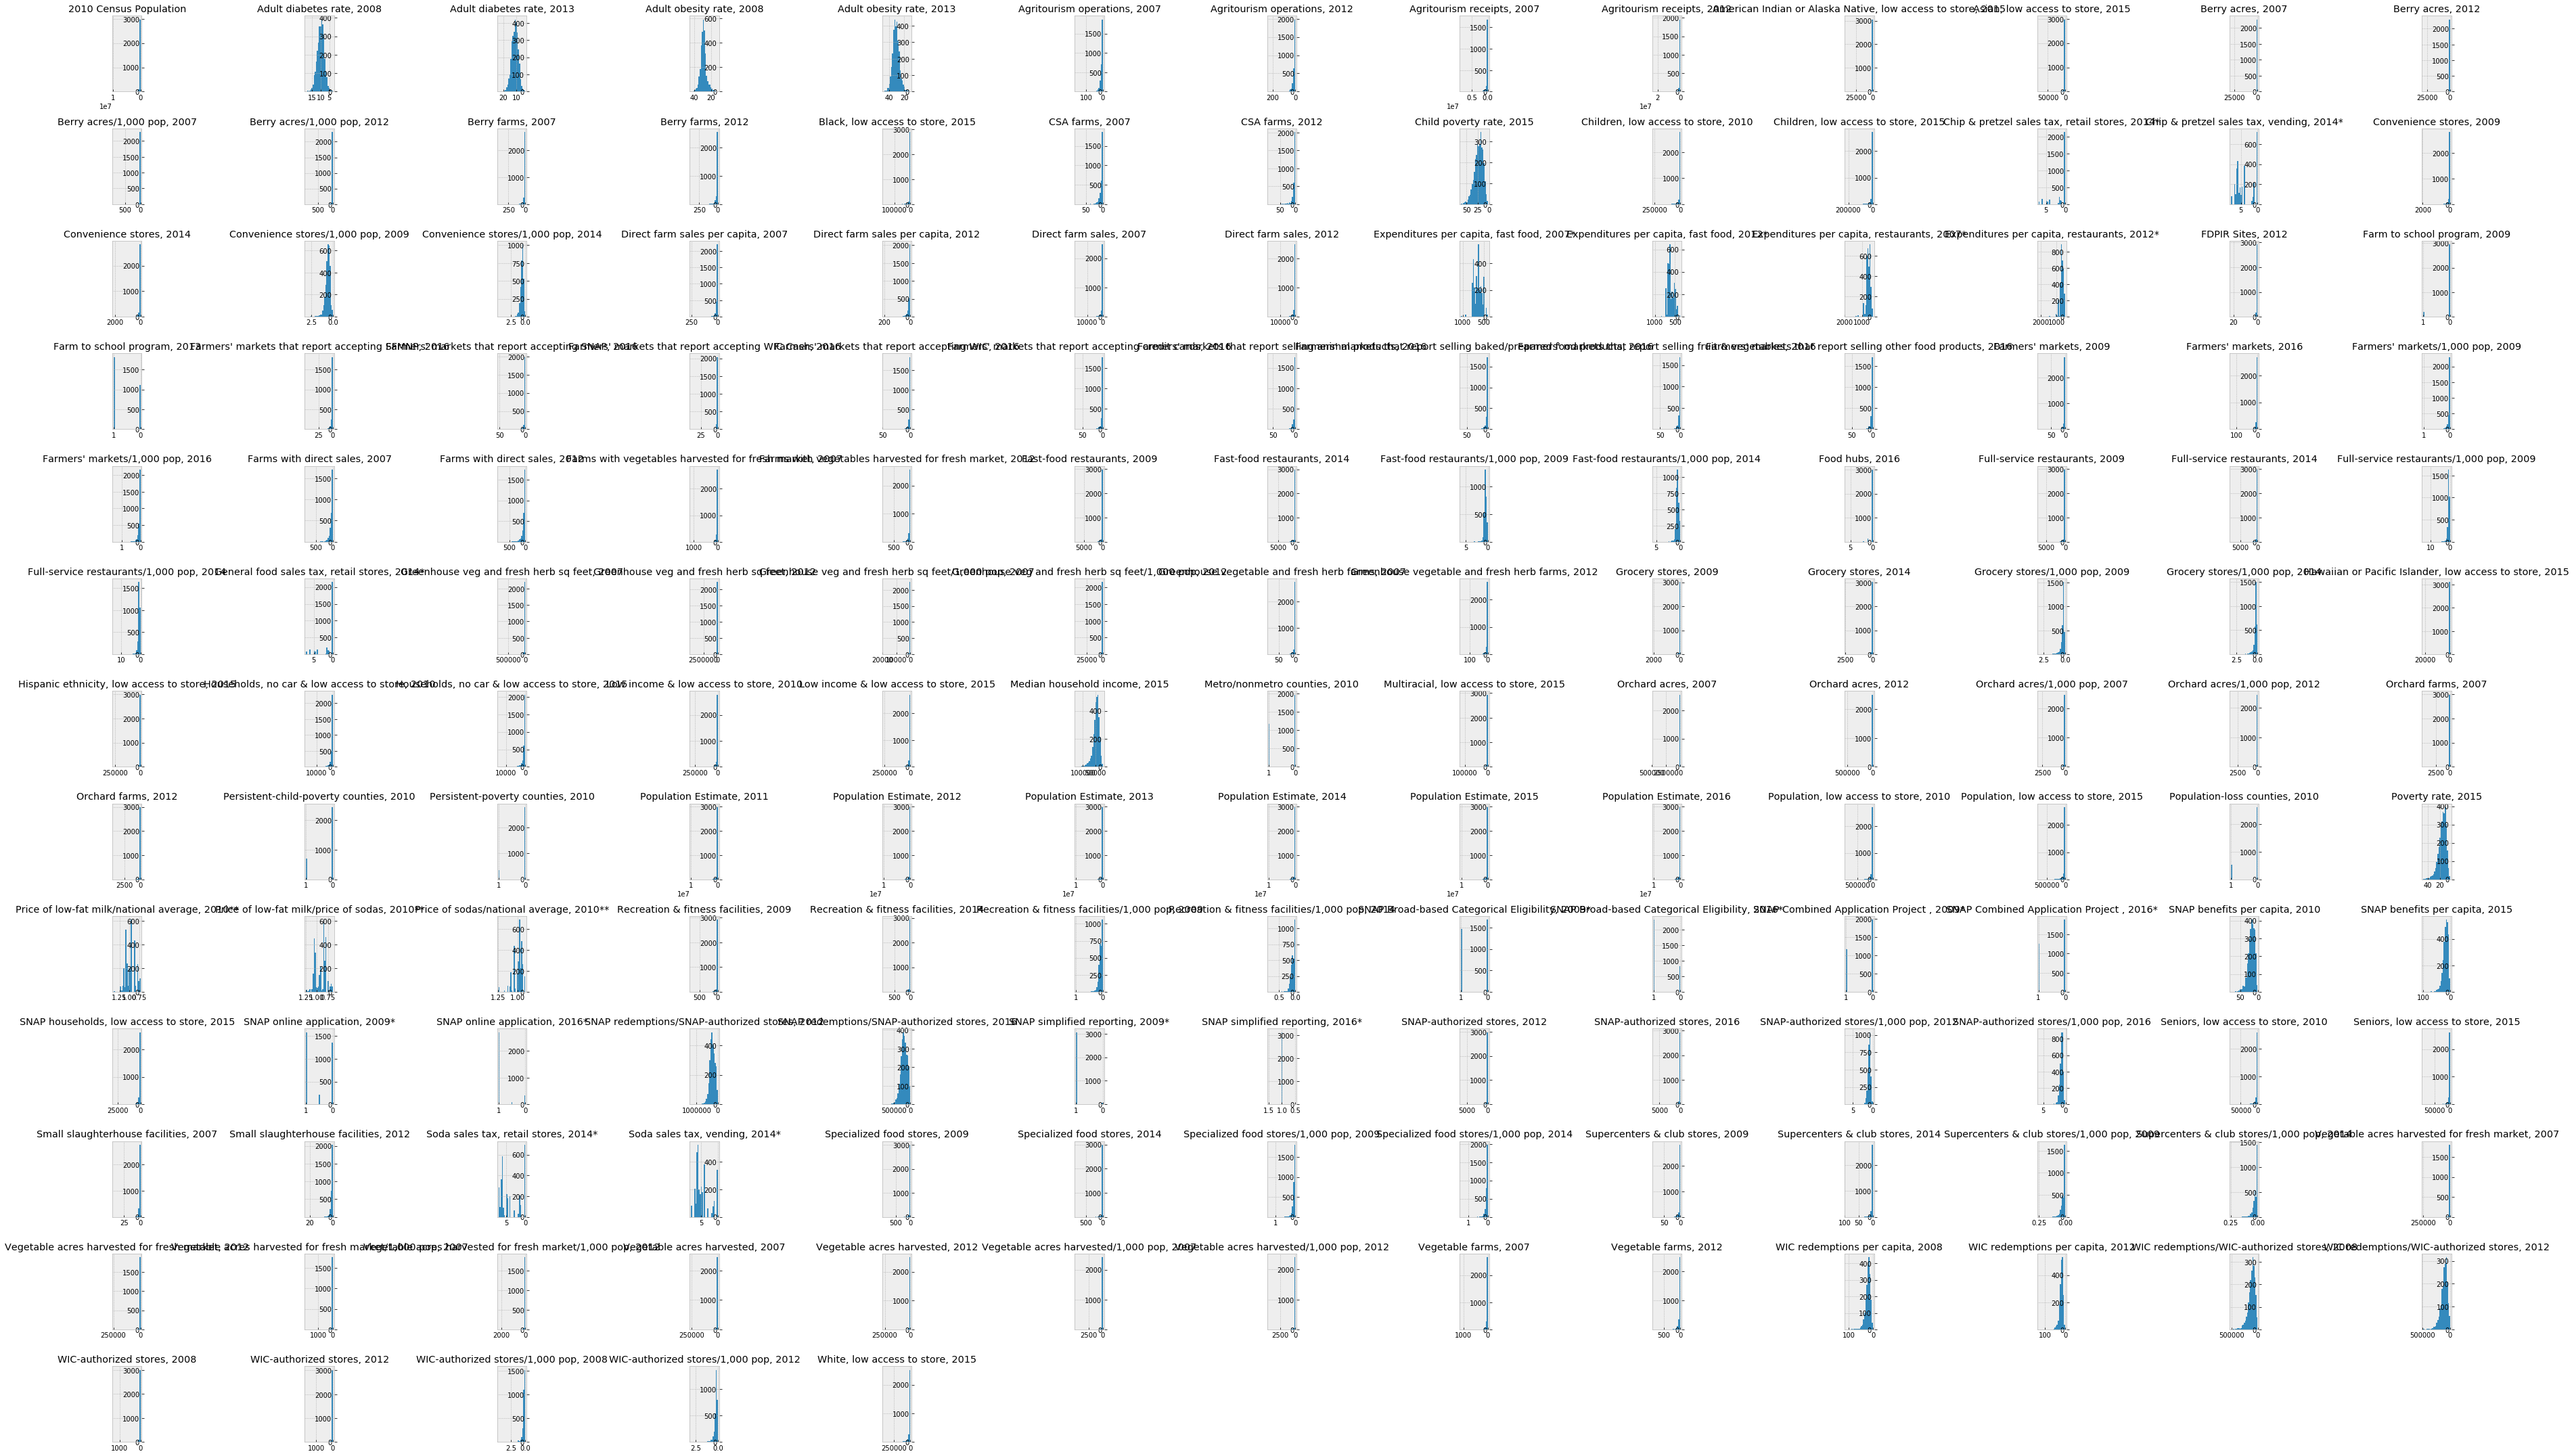

In [14]:
fig = df_num.hist(figsize=(50,30), bins=25)
plt.tight_layout()
plt.show()
#the above 2 were for clarity of vision, this one is for ease of calculation
#cut the programmer some slack :p

In [15]:
df_temp = df2[["FIPS","Grocery stores, 2014"]]

In [16]:
df_temp

FIPS  Grocery stores, 2014
0     39127                     8
1     12035                    17
2     16023                     1
3     12081                    50
4     22067                     3
5      5031                    20
6      1053                     4
7     20093                     1
8     51013                    45
9     42007                    29
10    19021                     4
11    16073                     3
12    17197                   102
13    54093                     2
14    22113                    16
15    24023                     6
16    32007                    11
17    40073                     4
18    48369                     3
19    48311                     0
20    28045                     3
21    19019                     3
22     6091                     1
23    41067                    92
24    13187                     3
25    27161                     3
26     1005                     5
27    21111                   155
28    48201                   771
29    48489                     1
...     ...                   ...
3113  47175                     0
3114  19111                     7
3115  16011                     5
3116  31101                     3
3117  17185                     2
3118  30039                     3
3119  50007                    42
3120  18069                     5
3121  26073                    10
3122  38063                     5
3123  21027                     6
3124  40035                     1
3125  31185                     3
3126  22015                    16
3127  55035                    12
3128  18121                     2
3129  42089                    20
3130  35007                     3
3131  21201                     1
3132  34013                   382
3133  13159                     3
3134  47075                     3
3135   5129                     3
3136  37137                     4
3137  16049                     4
3138  12127                    64
3139  20161                    10
3140  39105                     2
3141  39113                    84
3142  38055                     3

[3143 rows x 2 columns]

In [17]:
#Making "Grocery stores, 2014" the last last column

#gives a list of column headers
#list(df)

#df_target = df["TARGET"]
#df.drop(["TARGET"], axis=1)
df = df.drop(columns = ["Grocery stores, 2014","TARGET"], axis=1)
df = pd.merge(df,df_temp,on="FIPS")
list(df)

['FIPS',
 'Population, low access to store, 2010',
 'Population, low access to store, 2015',
 'Low income & low access to store, 2010',
 'Low income & low access to store, 2015',
 'Households, no car & low access to store, 2010',
 'Households, no car & low access to store, 2015',
 'SNAP households, low access to store, 2015',
 'Children, low access to store, 2010',
 'Children, low access to store, 2015',
 'Seniors, low access to store, 2010',
 'Seniors, low access to store, 2015',
 'White, low access to store, 2015',
 'Black, low access to store, 2015',
 'Hispanic ethnicity, low access to store, 2015',
 'Asian, low access to store, 2015',
 'American Indian or Alaska Native, low access to store, 2015',
 'Hawaiian or Pacific Islander, low access to store, 2015',
 'Multiracial, low access to store, 2015',
 'Grocery stores, 2009',
 'Grocery stores/1,000 pop, 2009',
 'Grocery stores/1,000 pop, 2014',
 'Supercenters & club stores, 2009',
 'Supercenters & club stores, 2014',
 'Supercenters & 

In [18]:
df

FIPS  Population, low access to store, 2010  \
0     39127                            3713.640840   
1     12035                           33564.747365   
2     16023                             605.164533   
3     12081                           74391.881668   
4     22067                            6896.431864   
5      5031                           24129.965162   
6      1053                            5188.706191   
7     20093                             350.213727   
8     51013                            5136.184060   
9     42007                           67604.925063   
10    19021                            2738.827615   
11    16073                            2056.337099   
12    17197                          242455.252478   
13    54093                              74.186764   
14    22113                            3425.894350   
15    24023                            1294.428666   
16    32007                           11097.091084   
17    40073                            2273.643219   
18    48369                            1384.846203   
19    48311                             692.861567   
20    28045                           19685.624349   
21    19019                            2754.206725   
22     6091                            2855.023103   
23    41067                           70499.471920   
24    13187                             369.651192   
25    27161                            5686.913873   
26     1005                            5722.305602   
27    21111                          131566.316373   
28    48201                          886068.668386   
29    48489                             894.727926   
...     ...                                    ...   
3113  47175                              98.012924   
3114  19111                            4919.817292   
3115  16011                            9351.751607   
3116  31101                            1843.198095   
3117  17185                            1006.757797   
3118  30039                            1957.509309   
3119  50007                           31125.802607   
3120  18069                            7638.158415   
3121  26073                            5721.565859   
3122  38063                            3125.999993   
3123  21027                            1961.618828   
3124  40035                            2597.002975   
3125  31185                            3569.564528   
3126  22015                           29629.757174   
3127  55035                           26548.945007   
3128  18121                            1605.425198   
3129  42089                           50921.538488   
3130  35007                            7046.763464   
3131  21201                            1705.338039   
3132  34013                           68649.951470   
3133  13159                             916.431892   
3134  47075                            3041.491805   
3135   5129                            2725.718432   
3136  37137                             651.566458   
3137  16049                            5583.991627   
3138  12127                          150118.321800   
3139  20161                           35861.649365   
3140  39105                            4990.542475   
3141  39113                          158183.232590   
3142  38055                            4944.006611   

      Population, low access to store, 2015  \
0                               1410.531617   
1                              33041.245469   
2                                618.473210   
3                              70204.895488   
4                               6826.518316   
5                              15955.202306   
6                               5058.775403   
7                               3977.000000   
8                               4485.108839   
9                              62536.298461   
10                              1931.800972   
11                              2160.613404   
12                            217703.442343   


In [19]:
df_num_corr = df.corr()["Grocery stores, 2014"][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending = False)
print("There are {} strongly correlated values with number of Grocery Stores\n{}".format(len(golden_features_list),golden_features_list))

There are 26 strongly correlated values with number of Grocery Stores
Grocery stores, 2009                      0.992597
Specialized food stores, 2014             0.966420
Specialized food stores, 2009             0.956298
WIC-authorized stores, 2008               0.941075
WIC-authorized stores, 2012               0.930626
SNAP-authorized stores, 2012              0.910626
SNAP-authorized stores, 2016              0.890639
2010 Census Population                    0.837746
Population Estimate, 2011                 0.837547
Population Estimate, 2012                 0.836951
Population Estimate, 2013                 0.836167
Population Estimate, 2014                 0.835014
Population Estimate, 2015                 0.833655
Population Estimate, 2016                 0.832024
Convenience stores, 2014                  0.709804
Convenience stores, 2009                  0.692089
Asian, low access to store, 2015          0.545962
Population, low access to store, 2010     0.539090
Population, 

C:\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


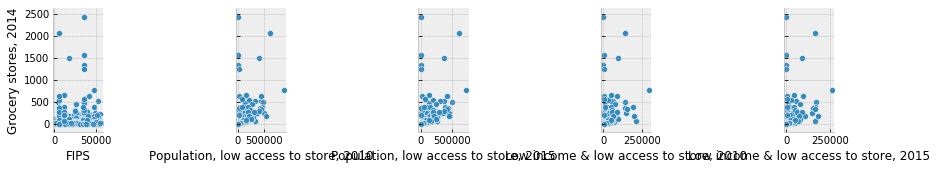

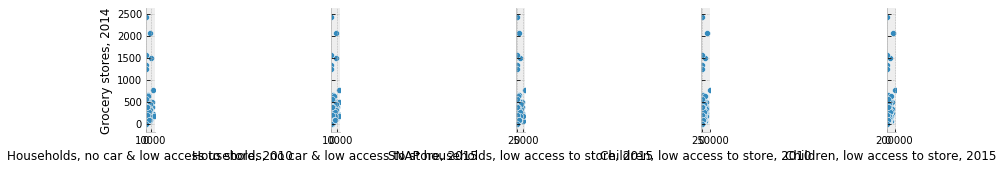

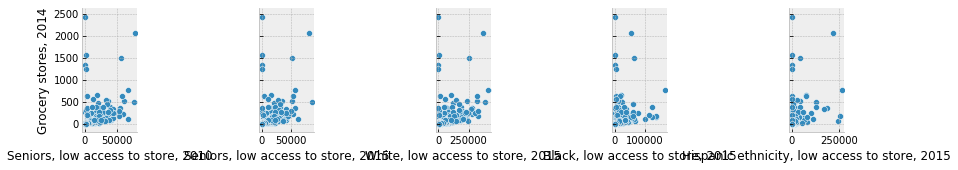

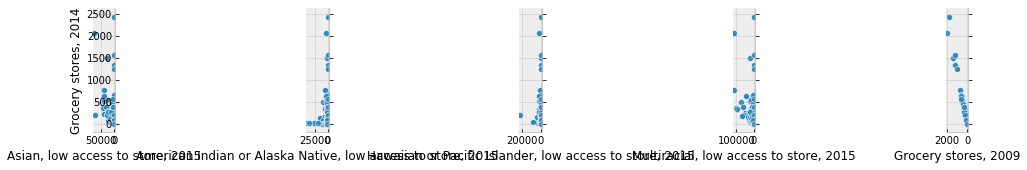

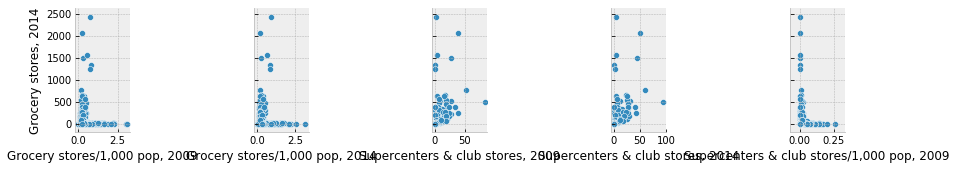

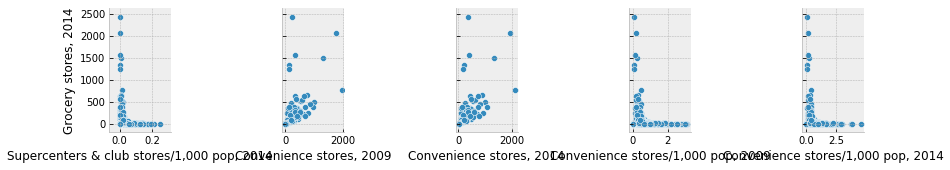

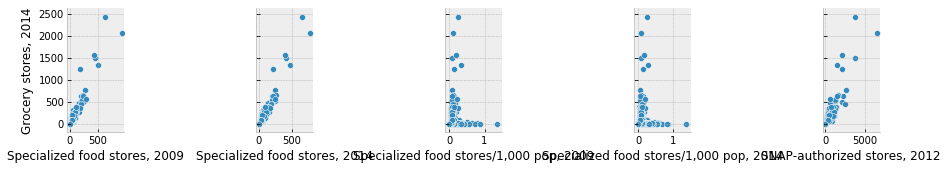

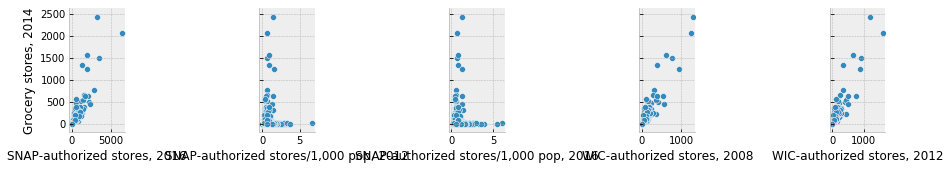

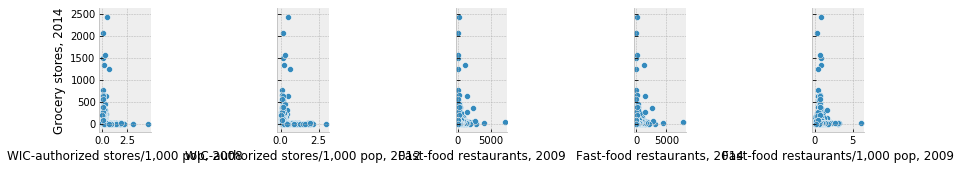

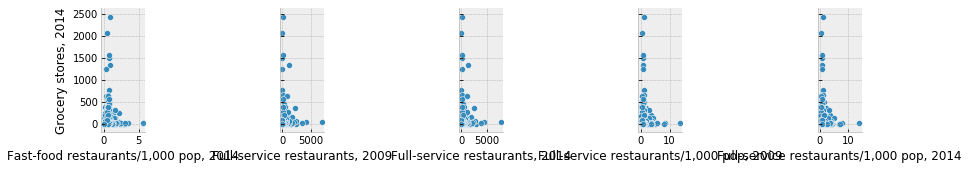

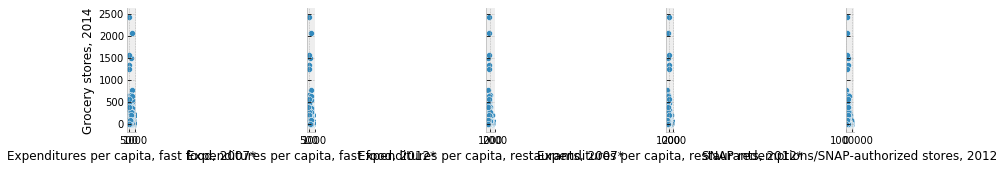

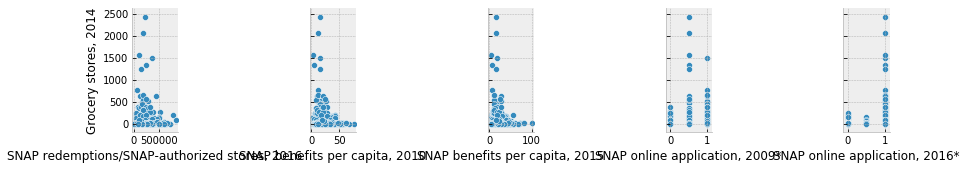

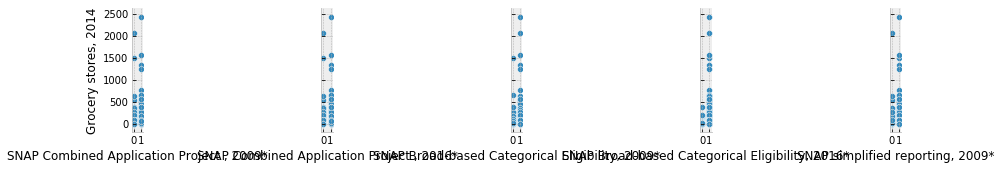

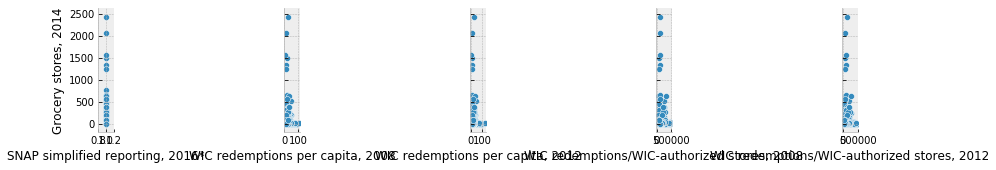

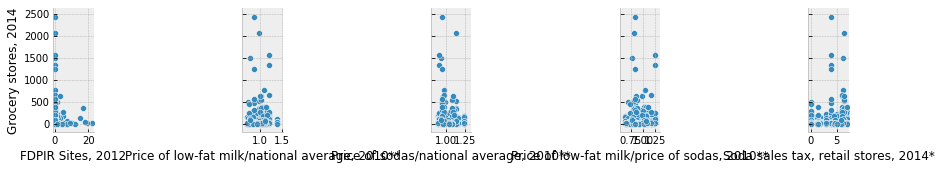

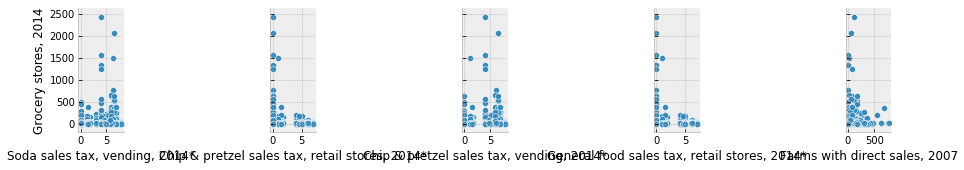

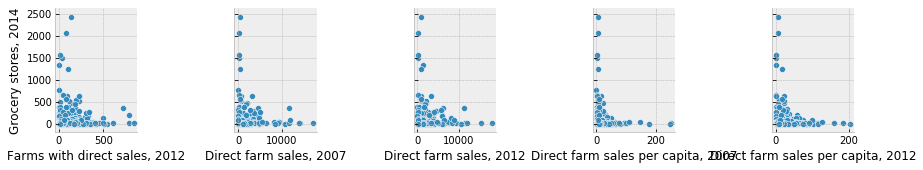

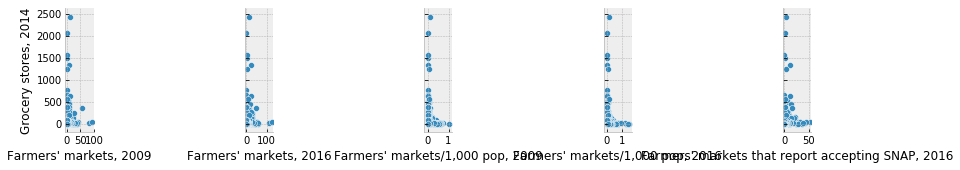

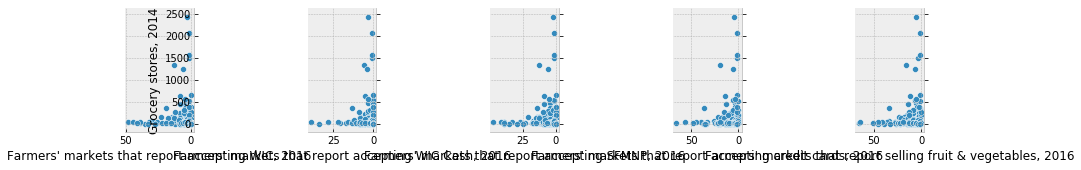

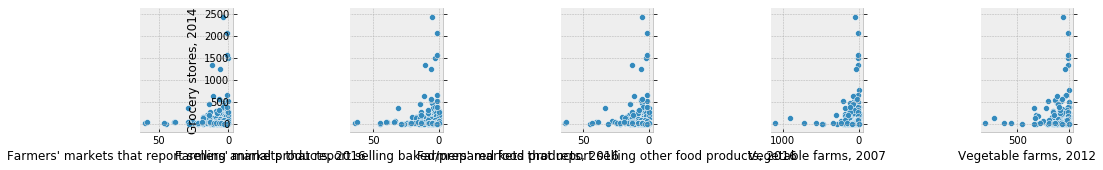

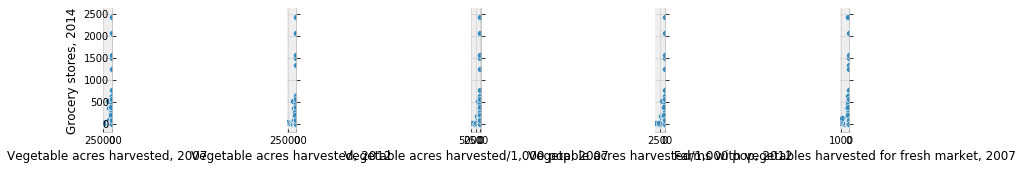

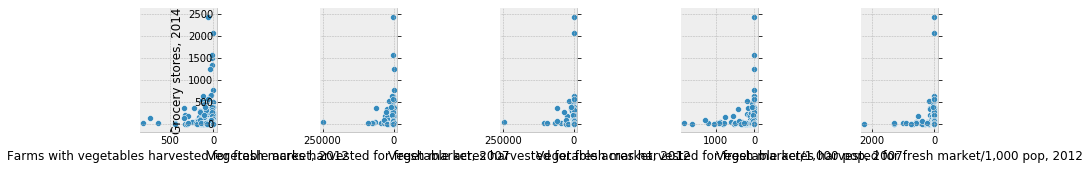

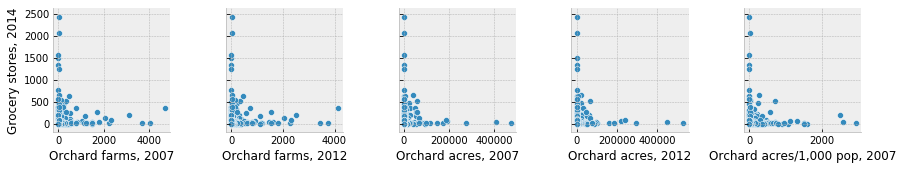

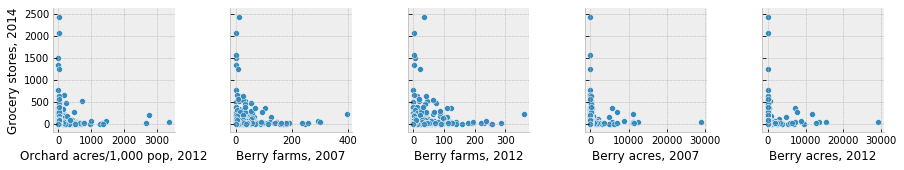

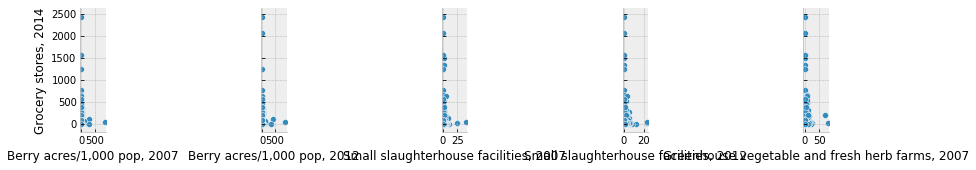

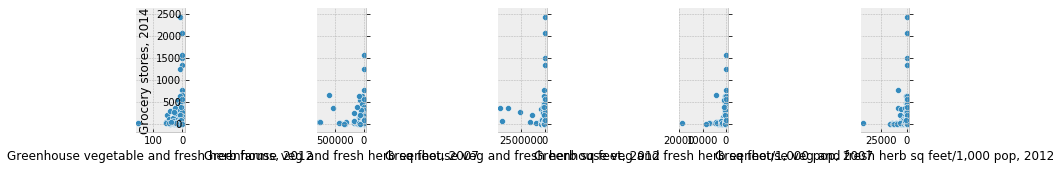

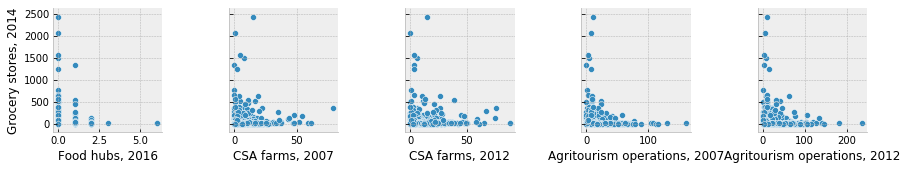

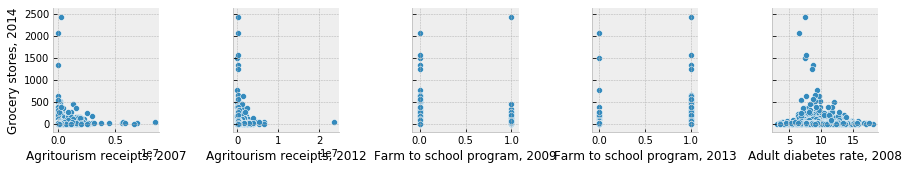

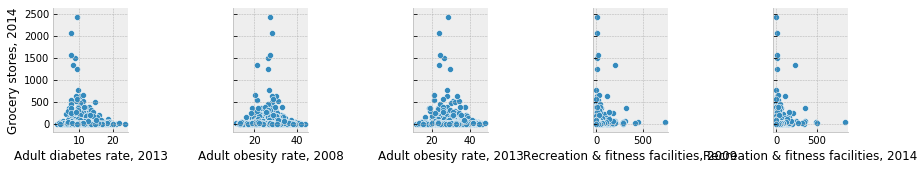

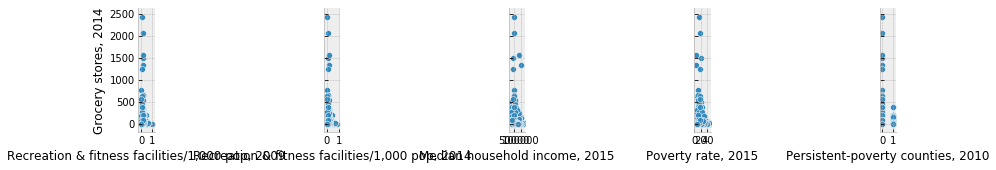

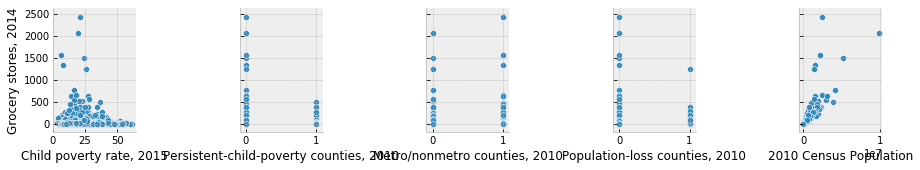

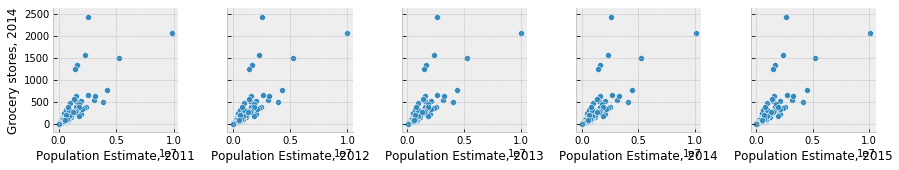

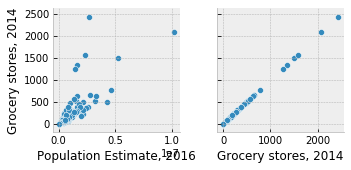

In [21]:
#we have a list of strongly correlated values, might be skewed by outliers.
#we can plot the features to confirm and check for outliers
#remove outliers and check correlation again
plt.close()
for i in range(0, len(df_num.columns), 5):
        plt.figure(figsize=(40,50))
        sns.pairplot(data = df,
                x_vars = df.columns[i:i+5],
                y_vars = ['Grocery stores, 2014'])
        #plt.tight_layout
        #plt.show()

In [22]:
plt.close()
#WE NEED TO FIGURE OUT HOW TO GET THESE IMAGES ALIGNED BEAUTIFULLY!BUT ONTO MORE PRESSING THINGS!
#lot of data points are on x=0, so we account for that:
import operator

individual_features_df = []
for i in range(0,len(df.columns)-1):
    tmpDf = df[[df.columns[i],'Grocery stores, 2014']]
    tmpDf = tmpDf[tmpDf[df.columns[i]] != 0]
    individual_features_df.append(tmpDf)
    
all_correlations = {feature.columns[0]: feature.corr()["Grocery stores, 2014"][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key = operator.itemgetter(1))
for (key,value) in all_correlations:
    print("{:>15}: {:>15}".format(key,value))


Supercenters & club stores/1,000 pop, 2009: -0.22956962757221008
Supercenters & club stores/1,000 pop, 2014: -0.21645656509534797
SNAP online application, 2009*: -0.19393220520650897
Convenience stores/1,000 pop, 2009: -0.18593297531712727
Convenience stores/1,000 pop, 2014: -0.17510932993644593
SNAP-authorized stores/1,000 pop, 2016: -0.08966092003308905
Expenditures per capita, fast food, 2012*: -0.08060895094272258
WIC-authorized stores/1,000 pop, 2008: -0.07540802263810657
Chip & pretzel sales tax, retail stores, 2014*: -0.07397707690940841
General food sales tax, retail stores, 2014*: -0.07397707690940841
WIC-authorized stores/1,000 pop, 2012: -0.06042190886266013
SNAP-authorized stores/1,000 pop, 2012: -0.05808689413037021
SNAP benefits per capita, 2010: -0.041291825662398335
           FIPS: -0.03620369786486665
WIC redemptions per capita, 2008: -0.03264566775617496
Expenditures per capita, fast food, 2007*: -0.024415400370163903
WIC redemptions per capita, 2012: -0.019827683137

In [23]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There are {} strongly correlated calues with number of Grocery Stores in 2014:\n{}".format(len(golden_features_list), golden_features_list))

There are 27 strongly correlated calues with number of Grocery Stores in 2014:
['Supercenters & club stores, 2009', 'Multiracial, low access to store, 2015', 'Supercenters & club stores, 2014', 'White, low access to store, 2015', 'Population, low access to store, 2015', 'Population, low access to store, 2010', 'Seniors, low access to store, 2015', 'Children, low access to store, 2015', 'Asian, low access to store, 2015', 'Children, low access to store, 2010', 'Seniors, low access to store, 2010', 'Convenience stores, 2009', 'Convenience stores, 2014', 'SNAP-authorized stores, 2016', 'SNAP-authorized stores, 2012', 'WIC-authorized stores, 2012', 'WIC-authorized stores, 2008', 'Specialized food stores, 2009', 'Specialized food stores, 2014', 'Grocery stores, 2009', 'Population Estimate, 2016', 'Population Estimate, 2015', 'Population Estimate, 2014', 'Population Estimate, 2013', 'Population Estimate, 2012', 'Population Estimate, 2011', '2010 Census Population']


In [24]:
#will display useful inputs about matplotplib
?%matplotlib

In [24]:
#correlation between variables
#the plot will take a while.
#WE NEED A FIGURE WINDOW TO OPEN FOR THIS.MOVING ON.
plt.close()
#%matplotlib nbagg
corr = df.drop("Grocery stores, 2014", axis=1).corr()
plt.figure(figsize=(300,300))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap = 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1,
            annot = True, annot_kws={"size":8}, square=True)

In [25]:
quantitative_features_list = ["FIPS",
"Population, low access to store, 2010",
"Population, low access to store, 2015",
"Low income & low access to store, 2010",
"Low income & low access to store, 2015",
"Households, no car & low access to store, 2010",
"Households, no car & low access to store, 2015",
"SNAP households, low access to store, 2015",
"Children, low access to store, 2010",
"Children, low access to store, 2015",
"Seniors, low access to store, 2010",
"Seniors, low access to store, 2015",
"White, low access to store, 2015",
"Black, low access to store, 2015",
"Hispanic ethnicity, low access to store, 2015",
"Asian, low access to store, 2015",
"American Indian or Alaska Native, low access to store, 2015",
"Hawaiian or Pacific Islander, low access to store, 2015",
"Multiracial, low access to store, 2015",
"Grocery stores, 2009",
"Grocery stores/1,000 pop, 2009",
"Grocery stores/1,000 pop, 2014",
"Supercenters & club stores, 2009",
"Supercenters & club stores, 2014",
"Supercenters & club stores/1,000 pop, 2009",
"Supercenters & club stores/1,000 pop, 2014",
"Convenience stores, 2009",
"Convenience stores, 2014",
"Convenience stores/1,000 pop, 2009",
"Convenience stores/1,000 pop, 2014",
"Specialized food stores, 2009",
"Specialized food stores, 2014",
"Specialized food stores/1,000 pop, 2009",
"Specialized food stores/1,000 pop, 2014",
"SNAP-authorized stores, 2012",
"SNAP-authorized stores, 2016",
"SNAP-authorized stores/1,000 pop, 2012",
"SNAP-authorized stores/1,000 pop, 2016",
"WIC-authorized stores, 2008",
"WIC-authorized stores, 2012",
"WIC-authorized stores/1,000 pop, 2008",
"WIC-authorized stores/1,000 pop, 2012",
"Fast-food restaurants, 2009",
"Fast-food restaurants, 2014",
"Fast-food restaurants/1,000 pop, 2009",
"Fast-food restaurants/1,000 pop, 2014",
"Full-service restaurants, 2009",
"Full-service restaurants, 2014",
"Full-service restaurants/1,000 pop, 2009",
"Full-service restaurants/1,000 pop, 2014",
"Expenditures per capita, fast food, 2007*",
"Expenditures per capita, fast food, 2012*",
"Expenditures per capita, restaurants, 2007*",
"Expenditures per capita, restaurants, 2012*",
"SNAP redemptions/SNAP-authorized stores, 2012",
"SNAP redemptions/SNAP-authorized stores, 2016",
"SNAP benefits per capita, 2010",
"SNAP benefits per capita, 2015",
"WIC redemptions per capita, 2008",
"WIC redemptions per capita, 2012",
"WIC redemptions/WIC-authorized stores, 2008",
"WIC redemptions/WIC-authorized stores, 2012",
"FDPIR Sites, 2012",
"Price of low-fat milk/national average, 2010**",
"Price of sodas/national average, 2010**",
"Price of low-fat milk/price of sodas, 2010**",
"Soda sales tax, retail stores, 2014*",
"Soda sales tax, vending, 2014*",
"Chip & pretzel sales tax, retail stores, 2014*",
"Chip & pretzel sales tax, vending, 2014*",
"General food sales tax, retail stores, 2014*",
"Farms with direct sales, 2007",
"Farms with direct sales, 2012",
"Direct farm sales, 2007",
"Direct farm sales, 2012",
"Direct farm sales per capita, 2007",
"Direct farm sales per capita, 2012",
"Farmers' markets, 2009",
"Farmers' markets, 2016",
"Farmers' markets/1,000 pop, 2009",
"Farmers' markets/1,000 pop, 2016",
"Farmers' markets that report accepting SNAP, 2016",
"Farmers' markets that report accepting WIC, 2016",
"Farmers' markets that report accepting WIC Cash, 2016",
"Farmers' markets that report accepting SFMNP, 2016",
"Farmers' markets that report accepting credit cards, 2016",
"Farmers' markets that report selling fruit & vegetables, 2016",
"Farmers' markets that report selling animal products, 2016",
"Farmers' markets that report selling baked/prepared food products, 2016",
"Farmers' markets that report selling other food products, 2016",
"Vegetable farms, 2007",
"Vegetable farms, 2012",
"Vegetable acres harvested, 2007",
"Vegetable acres harvested, 2012",
"Vegetable acres harvested/1,000 pop, 2007",
"Vegetable acres harvested/1,000 pop, 2012",
"Farms with vegetables harvested for fresh market, 2007",
"Farms with vegetables harvested for fresh market, 2012",
"Vegetable acres harvested for fresh market, 2007",
"Vegetable acres harvested for fresh market, 2012",
"Vegetable acres harvested for fresh market/1,000 pop, 2007",
"Vegetable acres harvested for fresh market/1,000 pop, 2012",
"Orchard farms, 2007",
"Orchard farms, 2012",
"Orchard acres, 2007",
"Orchard acres, 2012",
"Orchard acres/1,000 pop, 2007",
"Orchard acres/1,000 pop, 2012",
"Berry farms, 2007",
"Berry farms, 2012",
"Berry acres, 2007",
"Berry acres, 2012",
"Berry acres/1,000 pop, 2007",
"Berry acres/1,000 pop, 2012",
"Small slaughterhouse facilities, 2007",
"Small slaughterhouse facilities, 2012",
"Greenhouse vegetable and fresh herb farms, 2007",
"Greenhouse vegetable and fresh herb farms, 2012",
"Greenhouse veg and fresh herb sq feet, 2007",
"Greenhouse veg and fresh herb sq feet, 2012",
"Greenhouse veg and fresh herb sq feet/1,000 pop, 2007",
"Greenhouse veg and fresh herb sq feet/1,000 pop, 2012",
"Food hubs, 2016",
"CSA farms, 2007",
"CSA farms, 2012",
"Agritourism operations, 2007",
"Agritourism operations, 2012",
"Agritourism receipts, 2007",
"Agritourism receipts, 2012",
"Adult diabetes rate, 2008",
"Adult diabetes rate, 2013",
"Adult obesity rate, 2008",
"Adult obesity rate, 2013",
"Recreation & fitness facilities, 2009",
"Recreation & fitness facilities, 2014",
"Recreation & fitness facilities/1,000 pop, 2009",
"Recreation & fitness facilities/1,000 pop, 2014",
"Median household income, 2015",
"Poverty rate, 2015",
"Child poverty rate, 2015",
"2010 Census Population",
"Population Estimate, 2011",
"Population Estimate, 2012",
"Population Estimate, 2013",
"Population Estimate, 2014",
"Population Estimate, 2015",
"Population Estimate, 2016"]
len(quantitative_features_list)

147

In [26]:
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

FIPS  Population, low access to store, 2010  \
0  39127                            3713.640840   
1  12035                           33564.747365   
2  16023                             605.164533   
3  12081                           74391.881668   
4  22067                            6896.431864   

   Population, low access to store, 2015  \
0                            1410.531617   
1                           33041.245469   
2                             618.473210   
3                           70204.895488   
4                            6826.518316   

   Low income & low access to store, 2010  \
0                             1898.685754   
1                             9805.739747   
2                              267.297015   
3                            18524.575189   
4                             3895.543014   

   Low income & low access to store, 2015  \
0                              847.224107   
1                            12181.425241   
2                              307.711414   
3                            20564.984354   
4                             4231.922584   

   Households, no car & low access to store, 2010  \
0                                      790.543946   
1                                      861.286373   
2                                        6.680208   
3                                     1306.101746   
4                                      687.008404   

   Households, no car & low access to store, 2015  \
0                                      603.868779   
1                                      913.009272   
2                                        9.092895   
3                                     1547.709725   
4                                      726.285267   

   SNAP households, low access to store, 2015  \
0                                  168.620514   
1                                 1255.111943   
2                                   28.709604   
3                                 2335.402236   
4                                  628.112358   

   Children, low access to store, 2010  Children, low access to store, 2015  \
0                          1094.142002                           420.357841   
1                          6983.983143                          6912.412843   
2                           199.206240                           202.391428   
3                         12245.034104                         11756.424482   
4                          1723.974298                          1650.583590   

             ...              Median household income, 2015  \
0            ...                                    49796.0   
1            ...                                    45735.0   
2            ...                                    41803.0   
3            ...                                    34360.0   
4            ...                                    27225.0   

   Poverty rate, 2015  Child poverty rate, 2015  2010 Census Population  \
0                10.9                      17.3                   36058   
1                15.4                      27.4                   95696   
2                15.8                      24.3                    2891   
3                27.0                      36.9                  322833   
4                37.6                      52.7                   27979   

   Population Estimate, 2011  Population Estimate, 2012  \
0                      36207                      35991   
1                      97412                      98605   
2                       2805                       2722   
3                     327373                     334096   
4                      27502                      27454   

   Population Estimate, 2013  Population Estimate, 2014  \
0                      35977                      35886   
1                     100013                     102471   
2                       2626                       2609   
3                     342246                     351713   
4 

In [27]:
#trimming down on number of features
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('Grocery stores, 2014')
features_to_analyse

['Population, low access to store, 2010',
 'Population, low access to store, 2015',
 'Children, low access to store, 2010',
 'Children, low access to store, 2015',
 'Seniors, low access to store, 2010',
 'Seniors, low access to store, 2015',
 'White, low access to store, 2015',
 'Asian, low access to store, 2015',
 'Multiracial, low access to store, 2015',
 'Grocery stores, 2009',
 'Supercenters & club stores, 2009',
 'Supercenters & club stores, 2014',
 'Convenience stores, 2009',
 'Convenience stores, 2014',
 'Specialized food stores, 2009',
 'Specialized food stores, 2014',
 'SNAP-authorized stores, 2012',
 'SNAP-authorized stores, 2016',
 'WIC-authorized stores, 2008',
 'WIC-authorized stores, 2012',
 '2010 Census Population',
 'Population Estimate, 2011',
 'Population Estimate, 2012',
 'Population Estimate, 2013',
 'Population Estimate, 2014',
 'Population Estimate, 2015',
 'Population Estimate, 2016',
 'Grocery stores, 2014']

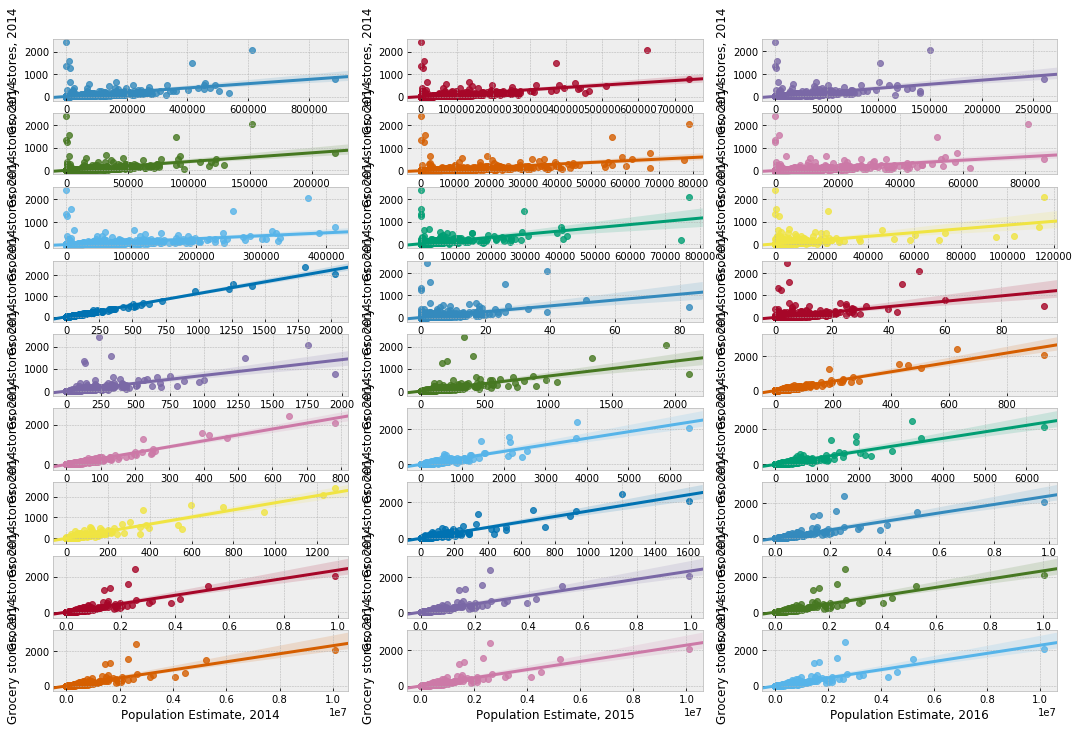

In [28]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18,12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y="Grocery stores, 2014", data=df[features_to_analyse], ax=ax)

In [29]:
categorical_features = ["SNAP online application, 2009*",
"SNAP online application, 2016*",
"SNAP Combined Application Project , 2009*",
"SNAP Combined Application Project , 2016*",
"SNAP Broad-based Categorical Eligibility, 2009*",
"SNAP Broad-based Categorical Eligibility, 2016*",
"SNAP simplified reporting, 2009*",
"SNAP simplified reporting, 2016*",
"Farm to school program, 2009",
"Farm to school program, 2013",
"Persistent-poverty counties, 2010",
"Persistent-child-poverty counties, 2010",
"Metro/nonmetro counties, 2010",
"Population-loss counties, 2010"]
df_categ = df[categorical_features]
df_categ.head()

SNAP online application, 2009*  SNAP online application, 2016*  \
0                             0.0                             1.0   
1                             1.0                             1.0   
2                             0.0                             0.0   
3                             1.0                             1.0   
4                             0.0                             1.0   

   SNAP Combined Application Project , 2009*  \
0                                          0   
1                                          1   
2                                          0   
3                                          1   
4                                          1   

   SNAP Combined Application Project , 2016*  \
0                                          0   
1                                          1   
2                                          0   
3                                          1   
4                                          1   

   SNAP Broad-based Categorical Eligibility, 2009*  \
0                                                1   
1                                                0   
2                                                1   
3                                                0   
4                                                0   

   SNAP Broad-based Categorical Eligibility, 2016*  \
0                                                1   
1                                                1   
2                                                1   
3                                                1   
4                                                0   

   SNAP simplified reporting, 2009*  SNAP simplified reporting, 2016*  \
0                                 1                                 1   
1                                 1                                 1   
2                                 1                                 1   
3                                 1                                 1   
4                                 1                                 1   

   Farm to school program, 2009  Farm to school program, 2013  \
0                           0.0                           1.0   
1                           1.0                           1.0   
2                           0.0                           1.0   
3                           0.0                           1.0   
4                           0.0                           0.0   

   Persistent-poverty counties, 2010  Persistent-child-poverty counties, 2010  \
0                                  0                                        0   
1                                  0                                        1   
2                                  0                                        0   
3                                  1                                        1   
4                                  1                                        1   

   Metro/nonmetro counties, 2010  Population-loss counties, 2010  
0                              0                             1.0  
1                              1                             0.0  
2                              0                             0.0  
3                              0                             0.0  
4                              0                             0.0